In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
import os

In [4]:
def ReadCSV(csvfile):
    csv = pd.read_csv(csvfile, header=None)
    return csv.values

In [5]:
csv_corona = ReadCSV(r"D:\Codes\keyan\data\corona_discharge\t2.csv")
label = "corona"

In [6]:
np_co = np.array(csv_corona)

In [7]:
def plot3(data, title):
    sns.set_style('dark')
    f, ax = plt.subplots()
    ax.set(ylabel='frequency')
    ax.set(xlabel='a(blue) / b(green) / c(red)')
    ax.set(title=title)
    sns.distplot(data[:, 0:1], color='blue')
    sns.distplot(data[:, 1:2], color='green')
    sns.distplot(data[:, 2:3], color='red')
    plt.show()

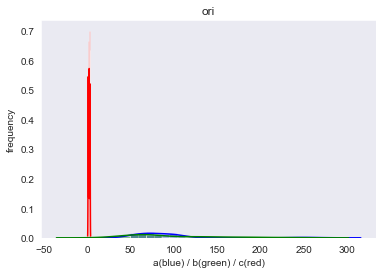

In [10]:
plot3(np_co, "ori")

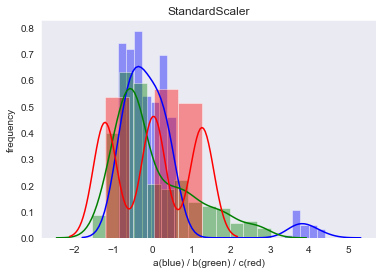

In [13]:
standard_scaler_data = preprocessing.StandardScaler().fit_transform(np_co)
plot3(standard_scaler_data, 'StandardScaler')

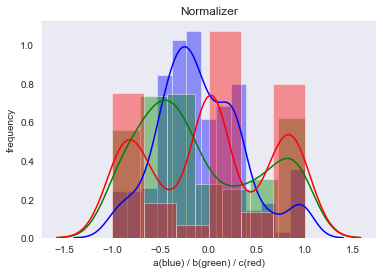

In [15]:
normalizer_data = preprocessing.Normalizer().fit_transform(standard_scaler_data)
plot3(normalizer_data, 'Normalizer')

In [17]:
normalizer_data

array([[ 0.94560291, -0.00685584, -0.32525088],
       [ 0.93409939, -0.1639711 , -0.31713058],
       [ 0.99787844, -0.06489994,  0.00515914],
       ...,
       [ 0.3886555 , -0.92125695,  0.01524891],
       [ 0.31228784, -0.52725743,  0.79023788],
       [ 0.60727255, -0.79416895,  0.02270971]])

In [18]:
standard_scaler_data

array([[ 3.55258974, -0.02575709, -1.22195365],
       [ 3.59923078, -0.63180624, -1.22195365],
       [ 3.59923078, -0.23408648,  0.01860843],
       ...,
       [ 0.47428108, -1.12422117,  0.01860843],
       [ 0.4976016 , -0.84013563,  1.25917051],
       [ 0.4976016 , -0.65074527,  0.01860843]])

In [19]:
np_co

array([[240,  93,   1],
       [242,  61,   1],
       [242,  82,   2],
       ...,
       [108,  35,   2],
       [109,  50,   3],
       [109,  60,   2]], dtype=int64)

In [20]:
def MyDataTransform(nparray):
    """
    模仿：
    1. sklearn.preprocessing中的StandardScaler().fit_transform
    2. tutorial中计算训练集均值与方差函数
    第一步：实现Normalization，将数据缩放到0和1之间，保留原始数据的分布，即减最小值除以（最大值减最小值）
    第二步：实现Standardization，将数据缩放到均值为0方差为1，即减均值除以标准差
    """